### **Análisis Exploratorio de Datos:** 
---
#### **Para este proceso se tendrá en cuenta el KPI establecido para actuar en base a ello y obtener visualizaciones claves y relevantes para el objetivo**.
#### **Se utilizarán las tablas de la base de datos ``telecomunicaciones`` creada previamente en PostgreSQL.**

- ##### **KPI: Aumento del 10% trimestral en la cobertura de Fibra Óptica en provincias con menor cobertura.**

---

#### **Objetivo:**
#### Identificar las provincias con menor cobertura de fibra óptica y proyectar un aumento del 10% para el próximo trimestre.

#### **Contexto:**
#### En el contexto de este análisis, se considera la fibra óptica como la tecnología avanzada por excelencia que proporciona las mayores velocidades de acceso a internet y estabilidad. Es crucial aumentar la cobertura de fibra óptica en las provincias más rezagadas para mejorar la infraestructura digital del país.

#### También se hace un análisis general sobre la tecnología Wireless debido a que las versiones más recientes como 5G o Wi-Fi 6 son tecnologías avanzadas, pero debido a la falta de precisión sobre el tipo de tecnología wireless presente no se lo tiene en cuenta. Pero podría considerarse un futuro análisis con datos más precisos sobre qué tipo de tecnología Wireless se trata para incluir un KPI de mejora del servicio en provincias que tengan tecnología Wireless más antiguas.

#### **Metodología:**
#### La metodología consiste en identificar el porcentaje de localidades en cada provincia que tienen acceso a fibra óptica en el trimestre actual. A continuación, proyectaremos un aumento del 10% en la cobertura para el próximo trimestre, aplicando la fórmula:

- ##### **KPI = ((Cobertura Nueva - Cobertura Actual) / Cobertura Actual) * 100**
#### Se espera que este aumento refleje una mejora en la infraestructura de telecomunicaciones y el acceso a ésta tecnología en regiones menos cubiertas.

#### **Provincias con menor cobertura:**
#### Para definir las provincias con menor cobertura, se toma en cuenta el 25% inferior de provincias en términos de acceso a tecnologías avanzadas (fibra óptica en este caso). Esto garantiza que el análisis se centre en las regiones más necesitadas de infraestructura.
---

### Importación de librerías necesarias para el proceso de Análisis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import psycopg2
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Conexión a la Base de Datos y Extracción de Datos

##### Se extrajo información de la base de datos relacionada con la cobertura de fibra óptica y wireless, para evaluar el acceso a tecnologías avanzadas. Sin embargo, el KPI se centra únicamente en fibra óptica, debido a la falta de precisión sobre el tipo de tecnología wireless presente.

### Consulta SQL:
##### Se realizó una consulta SQL que filtra por aquellas localidades donde están disponibles al menos una de las siguientes tecnologías:
- ##### Fibra óptica
- ##### Wireless

In [3]:
# Conexión a la base de datos
conn = psycopg2.connect(
    host="localhost",
    database="telecomunicaciones",
    user="USSER",
    password="PSSW"
)

# Consulta SQL para obtener las tecnologías más avanzadas de internet
query = """
SELECT 
    l.localidad, 
    p.nombre_provincia, 
    mc.fibra_optica, 
    mc.wireless, 
    mc.poblacion 
FROM 
    mapa_conectividad mc
JOIN 
    localidades l ON mc.id_localidad = l.id_localidad
JOIN 
    provincias p ON l.id_provincia = p.id_provincia
WHERE 
    mc.fibra_optica = TRUE OR mc.wireless = TRUE
ORDER BY 
    p.nombre_provincia, l.localidad;

"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_tecnologias = pd.read_sql(query, conn)

# Cerrar la conexión
conn.close()

# Visualizar el DataFrame
df_tecnologias.head()


,localidad,nombre_provincia,fibra_optica,wireless,poblacion
0,11 de septiembre,buenos aires,True,False,4402
1,12 de octubre,buenos aires,False,True,219
2,20 de junio,buenos aires,False,True,1171
3,25 de mayo,buenos aires,False,True,23408
4,30 de agosto,buenos aires,True,False,4777


#### **DISTRIBUCIÓN DE COBERTURA DE FIBRA ÓPTICA POR PROVINCIA**
##### Este gráfico de barras horizontales muestra el porcentaje de localidades con acceso a fibra óptica por cada provincia.
- ##### ***Provincias con mayor cobertura:*** Tierra del Fuego, CABA, y Santa Cruz encabezan la lista con una cobertura cercana al 100%, lo que indica una infraestructura tecnológica avanzada en estas zonas.
- ##### ***Provincias con menor cobertura:*** San Juan, Formosa, y Tucumán presentan los niveles más bajos de cobertura, lo que refleja una necesidad de inversión en tecnología de fibra óptica en estas áreas.

##### **Observaciones Clave:**
- ##### **Disparidad regional:** Existe una gran disparidad entre las provincias en términos de cobertura de fibra óptica. Mientras algunas provincias alcanzan casi el 100% de localidades conectadas, otras están muy por debajo, lo que podría sugerir una brecha digital importante.
- ##### **Oportunidades de mejora:** El KPI de aumentar un 10% la cobertura en las provincias con menor acceso debería enfocarse principalmente en provincias como San Juan, Formosa y Tucumán. Estas regiones representan áreas clave donde un incremento de cobertura podría generar un impacto significativo.
- ##### **Posible impacto del crecimiento:** Aumentar la cobertura de fibra óptica en estas provincias no solo reduciría la brecha digital, sino que también podría fomentar el crecimiento económico a través de una mejor conectividad a internet.

##### **Conclusión:**
##### El gráfico subraya la disparidad de acceso a la tecnología de fibra óptica en el país, con varias provincias que requieren una mayor atención e inversión. El objetivo del KPI (aumentar un 10% trimestral la cobertura en provincias con menor acceso) es especialmente relevante en las provincias más rezagadas.

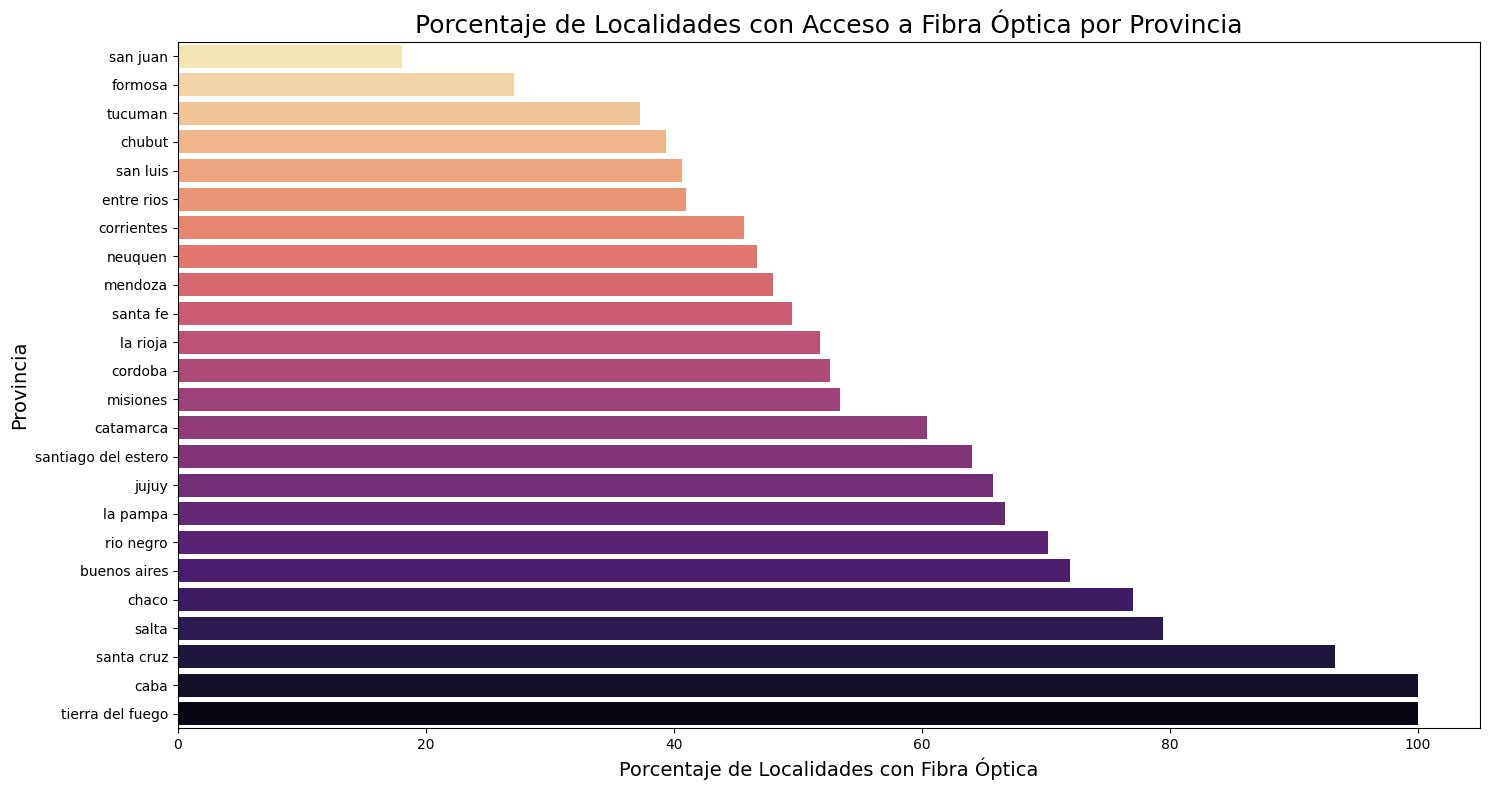

In [62]:
# Filtro por localidades que tienen fibra óptica
df_fibra_optica = df_tecnologias[df_tecnologias['fibra_optica'] == True]

# Total de localidades por provincia
total_localidades_provincia = df_tecnologias.groupby('nombre_provincia')['localidad'].count()

# Total de localidades con fibra óptica por provincia
localidades_fibra_provincia = df_fibra_optica.groupby('nombre_provincia')['localidad'].count()

# Porcentaje de localidades con fibra óptica por provincia
porcentaje_fibra_optica = (localidades_fibra_provincia / total_localidades_provincia) * 100

# Ordenamos por porcentaje de menor a mayor
porcentaje_fibra_optica = porcentaje_fibra_optica.sort_values()

# Gráfico de barras horizontales
plt.figure(figsize=(15, 8))
sns.barplot(x=porcentaje_fibra_optica, y=porcentaje_fibra_optica.index, palette='magma_r')

# Título y etiquetas
plt.title('Porcentaje de Localidades con Acceso a Fibra Óptica por Provincia', fontsize=18)
plt.xlabel('Porcentaje de Localidades con Fibra Óptica', fontsize=14)
plt.ylabel('Provincia', fontsize=14)

# Visualización
plt.tight_layout()
plt.show()


#### **COBERTURA DE FIBRA ÓPTICA ACTUAL VS PROYECTADA (10% Aumento)**
##### Este gráfico compara la cobertura actual de fibra óptica en las provincias seleccionadas (25% inferior) con la cobertura proyectada tras un aumento del 10% en el próximo trimestre, siguiendo el KPI establecido.

##### **Observaciones Clave:**
- ##### ***Provincias con menor cobertura:*** San Juan y Formosa son las provincias con la cobertura más baja de fibra óptica, con menos del 30% de sus localidades cubiertas.
- ##### ***Provincias con mayor cobertura:*** Entre Ríos, Tucumán y San Luis ya muestran un nivel de cobertura relativamente mayor, alrededor del 40-50%, lo que implica que el aumento proyectado puede marcar una diferencia notable en estas provincias, aunque sigue siendo insuficiente para alcanzar niveles de alta cobertura.
##### **Impacto del Aumento Proyectado:**
##### El aumento proyectado del 10% logra incrementar la cobertura en todas las provincias seleccionadas, pero no lo suficiente como para llevar a ninguna provincia a una cobertura mayoritaria. Esto muestra la necesidad de una inversión considerable a largo plazo para mejorar la infraestructura de fibra óptica, especialmente en las provincias más rezagadas.
##### **Conclusión:**
##### Aunque el aumento proyectado del 10% es un paso en la dirección correcta, las provincias seleccionadas muestran una brecha considerable en la cobertura de fibra óptica. Es posible que se necesiten más de un trimestre de mejoras del 10% para reducir esta desigualdad.

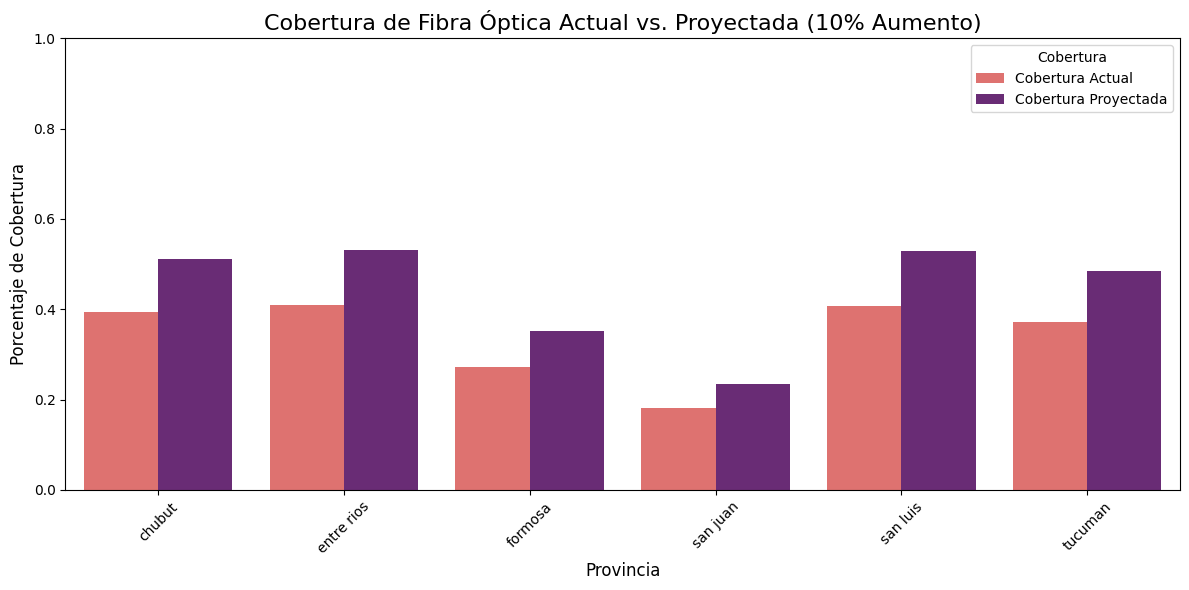

In [147]:
# Se toman las provincias en el 25% inferior de cobertura fibra óptica
prov_menor_cobertura_fibra = df_tecnologias.groupby('nombre_provincia')['fibra_optica'].mean()
prov_menor_cobertura_fibra = prov_menor_cobertura_fibra[prov_menor_cobertura_fibra < prov_menor_cobertura_fibra.quantile(0.25)]

# Se aplica el KPI: 10% de aumento
prov_menor_cobertura_fibra_proyectado = prov_menor_cobertura_fibra * 1.30


# DataFrame para fibra óptica (con cobertura actual y proyectada)
df_fibra_optica = pd.DataFrame({
    'Provincia': prov_menor_cobertura_fibra.index,
    'Cobertura Actual': prov_menor_cobertura_fibra.values,
    'Cobertura Proyectada': prov_menor_cobertura_fibra_proyectado.values
})

# DataFrame para el gráfico de barras (con melt para seaborn)
df_fibra_optica_melted = df_fibra_optica.melt(id_vars='Provincia', 
                                              value_vars=['Cobertura Actual', 'Cobertura Proyectada'], 
                                              var_name='Cobertura', value_name='Porcentaje')

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Porcentaje', hue='Cobertura', data=df_fibra_optica_melted, palette='magma_r')
plt.title('Cobertura de Fibra Óptica Actual vs. Proyectada (10% Aumento)', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Porcentaje de Cobertura', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Como la cobertura está en porcentaje (1 = 100%)
plt.legend(title='Cobertura')
plt.tight_layout()
plt.show()

#### **DISTRIBUCIÓN DE COBERTURA DE WIRELESS POR PROVINCIA**
##### Este gráfico de barras muestra el porcentaje de localidades en cada provincia que cuentan con acceso a la tecnología wireless para internet, lo que nos ayuda a visualizar qué provincias tienen mayor o menor penetración de esta tecnología en sus localidades.

##### **Observaciones Clave:**
- ##### ***Provincias con mayor cobertura wireless:*** Las provincias de Tierra del Fuego, San Juan, Formosa, Santa Cruz y CABA cuentan con una penetración wireless superior al 80%, lo que sugiere que estas provincias tienen una infraestructura wireless bien establecida, lo cual puede ser un indicativo de la poca necesidad de cableado físico en estas zonas.

- ##### ***Provincias con menor cobertura wireless:*** Jujuy, Salta, Catamarca y Santiago del Estero muestran los niveles más bajos de penetración wireless, aunque incluso en estos casos, la cobertura aún supera el 50%.

##### **Conclusión**:
##### Dada la naturaleza de los datos, no es posible proyectar mejoras claras en la tecnología wireless sin conocer más sobre la calidad de la infraestructura instalada. Pero, el gráfico sugiere que con un análisis más proncunciado sobre que tencología Wireless está implementada en cada zona, se podrían establecer KPIs en miras de mejorar el servicio.

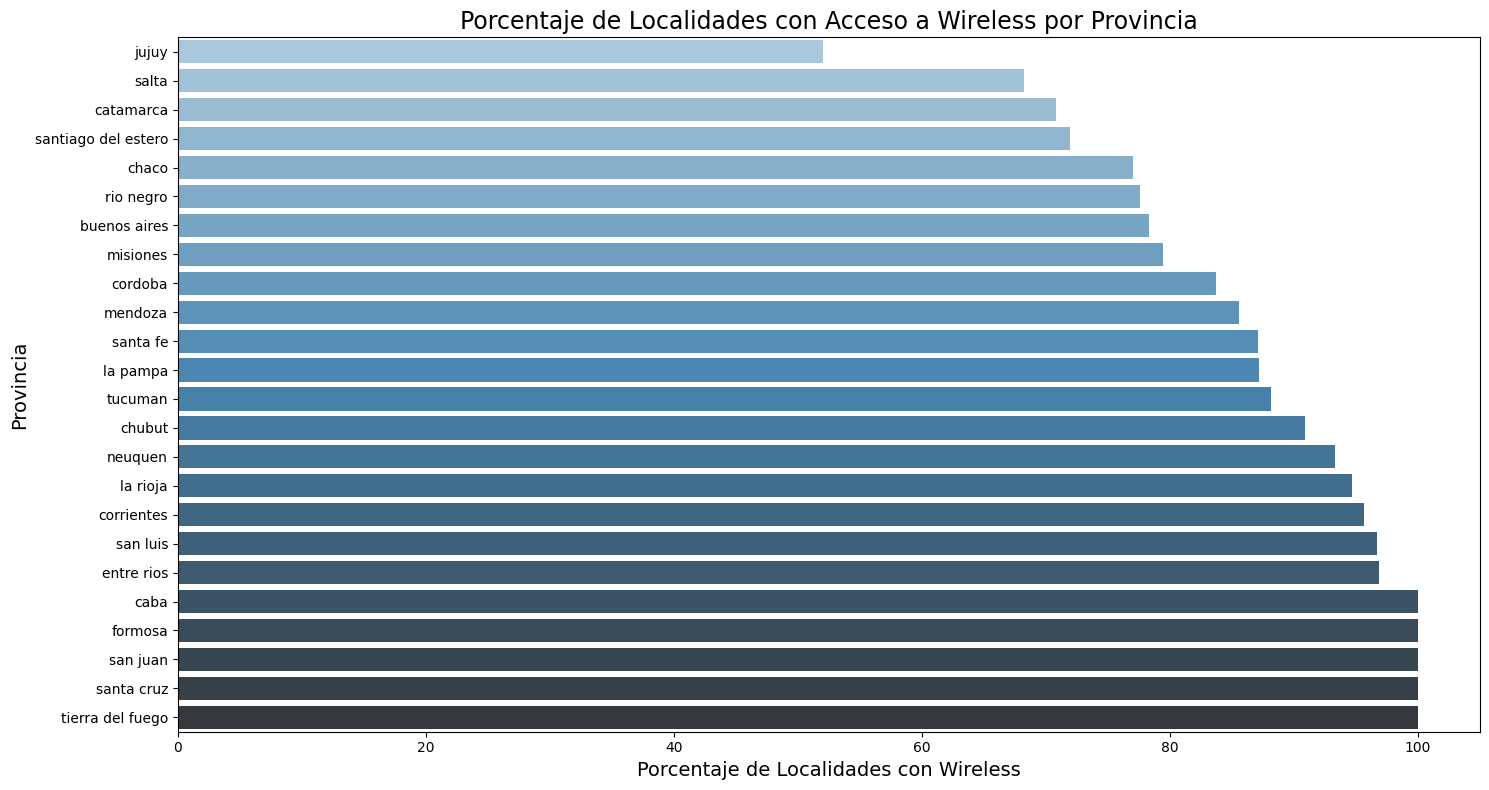

In [6]:
# Cálculo del porcentaje de localidades con tecnología wireless por provincia
df_wireless = df_tecnologias.groupby('nombre_provincia').agg(
    total_localidades=('localidad', 'size'),
    wireless_localidades=('wireless', 'sum')
).reset_index()

# Porcentaje de localidades con acceso a wireless
df_wireless['porcentaje_wireless'] = (df_wireless['wireless_localidades'] / df_wireless['total_localidades']) * 100

# Ordenar el DataFrame por porcentaje
df_wireless = df_wireless.sort_values('porcentaje_wireless')

# Vráfico de barras horizontales
plt.figure(figsize=(15, 8))
sns.barplot(x='porcentaje_wireless', y='nombre_provincia', data=df_wireless, palette='Blues_d')

# Título y etiquetas
plt.title('Porcentaje de Localidades con Acceso a Wireless por Provincia', fontsize=17)
plt.xlabel('Porcentaje de Localidades con Wireless', fontsize=14)
plt.ylabel('Provincia', fontsize=14)

# Visualización
plt.tight_layout()
plt.show()


---

### **CONSIDERACIONES FINALES**

#### **Consideraciones sobre el KPI:**
##### A lo largo de este análisis, se ha implementado un KPI que busca mejorar la cobertura y penetración de Fibra Óptica en distintas provincias. Sin embargo, es importante destacar que, durante el proceso, surgieron consideraciones clave que podrían llevar a una implementación aún más efectiva en un **contexto real**:

- ##### **Ajustar el KPI según el contexto de cada provincia:**

##### Aunque el KPI implementado considera un aumento uniforme del 10% en la cobertura de fibra óptica, un enfoque más adecuado podría ser el ajuste del KPI según la situación de cada provincia.
##### Provincias con una cobertura inicial muy baja (por ejemplo, por debajo del 30%) requieren esfuerzos más intensivos para cerrar la brecha de conectividad, mientras que provincias con una cobertura más alta podrían beneficiarse más de un enfoque orientado a mejorar la calidad del servicio en lugar de un aumento significativo en la cobertura.
##### Un enfoque ajustado permitiría una distribución más eficiente de los recursos e inversiones, garantizando que las provincias más rezagadas reciban la atención necesaria para alcanzar un nivel mínimo de conectividad.
#### **Consideraciones sobre la infraestructura tecnológica:**

##### El despliegue de tecnologías como la fibra óptica requiere una infraestructura considerable y tiempos de implementación más largos.
##### Esto sugiere que un KPI más ambicioso, como un aumento del 30% en ciertas áreas, puede ser factible en algunas provincias, pero no necesariamente en todas, especialmente en aquellas con condiciones geográficas o socioeconómicas más complejas.

#### **Consideraciones sobre la tecnología Wireless:**
##### Con información más detallada sobre el tipo de tecnología wireless, se podría hacer un análisis más profundo evaluando las versiones tecnológicas implementadas, lo que podría permitir establecer KPIs ajustados para mejorar las conexiones, específicamente en tecnologías avanzadas como 5G o Wi-Fi 6. 

#### **Escalabilidad del modelo de KPI:**

##### Para futuros análisis y mejoras en la infraestructura de telecomunicaciones, la metodología podría ampliarse con KPIs diferenciados por provincias, estableciendo metas más ambiciosas en áreas donde se ha identificado una mayor brecha digital.
##### Este enfoque escalable y ajustable permitiría una evolución más sostenible del sector y garantizaría que cada provincia tenga un progreso acorde a sus necesidades y limitaciones específicas.
##### **Reflexión Final:**
##### El análisis realizado ha cumplido con los objetivos establecidos, pero se ha dejado la puerta abierta a mejoras futuras. En un proyecto más amplio, se podrían ajustar los KPIs para ser más específicos a las necesidades de cada región, asegurando un desarrollo tecnológico más inclusivo y equilibrado en todo el país.